Prepare a model for glass classification using KNN

In [12]:
#import dataset
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#to ignore warnings for user convinence
import warnings
warnings.filterwarnings('ignore')

In [13]:
#import dataset
glass=pd.read_csv('glass.csv')
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [14]:
#check for null values
print(glass.isna().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [17]:
#print  datatypes
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [21]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']


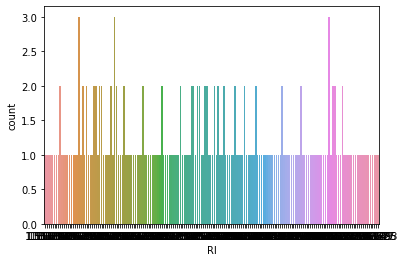

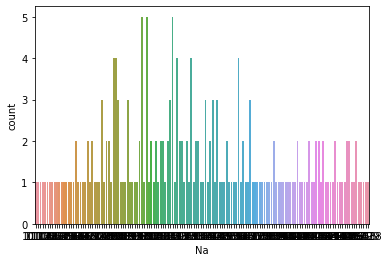

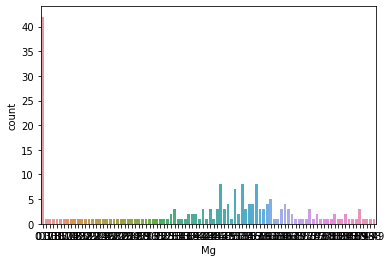

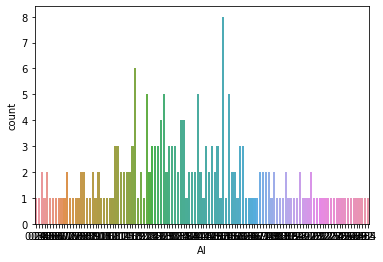

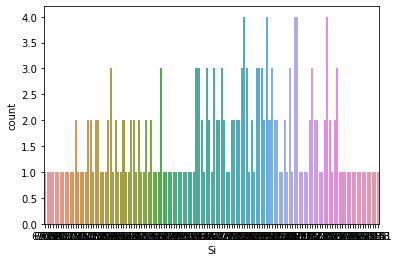

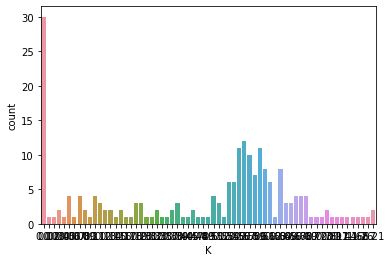

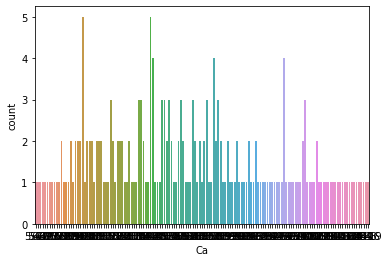

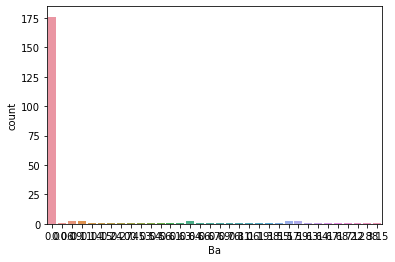

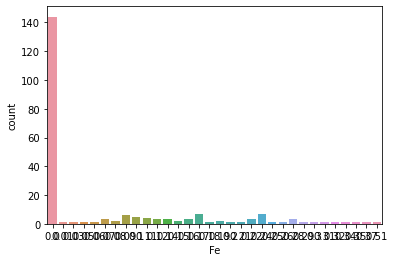

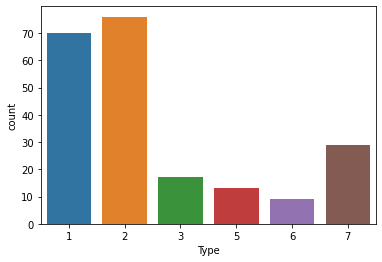

In [23]:
for feature in features:
    sns.countplot(glass[feature])
    plt.show()

In [42]:
dataframe=glass.values
X=dataframe[:,0:9]
y=dataframe[:,9]

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

n_neighbors=np.array(range(2,50))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [44]:
#get best score
print(grid.best_score_)
print(grid.best_params_)

0.6311184939091916
{'n_neighbors': 2}


In [45]:
kfold=KFold(n_splits=10)
knn=KNeighborsClassifier(n_neighbors=1)
result=cross_val_score(knn,X,Y,cv=kfold)

In [46]:
print(result.mean())

0.5599567099567099


In [47]:
knn.fit(X,Y)
pred=knn.predict(X)
pred[17]

1.0

In [48]:
knn.fit(X,Y)
pred_=knn.predict(X)
glass['predicted_type']=pred_
glass.iloc[136:152:,]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,predicted_type
136,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,2,2.0
137,1.51711,12.89,3.62,1.57,72.96,0.61,8.11,0.00,0.00,2,2.0
138,1.51674,12.79,3.52,1.54,73.36,0.66,7.90,0.00,0.00,2,2.0
139,1.51674,12.87,3.56,1.64,73.14,0.65,7.99,0.00,0.00,2,2.0
140,1.51690,13.33,3.54,1.61,72.54,0.68,8.11,0.00,0.00,2,2.0
141,1.51851,13.20,3.63,1.07,72.83,0.57,8.41,0.09,0.17,2,2.0
142,1.51662,12.85,3.51,1.44,73.01,0.68,8.23,0.06,0.25,2,2.0
143,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2,2.0
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2,2.0
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2,2.0
